## Write Custom Function to Compute Histogram for a Numerical Array

- You can use numpy

- Your function takes two arguments: 1- list 2- interval

- Your function would return a dictionary with intervals as keys and how many of elements in list are in the intervals as values



In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic.csv')

In [21]:
# histogram function
# ls = input list
# interval = number of intervals on a scale beginning at 0

def custom_hist(ls, interval):
    hist_ls_dict = dict() # creates a dictionary {x:y, x1:y1, etc.}
    min_ls = np.min(ls) # the minimum value in ls: 0.47
#     print(min_ls)
    max_ls = np.max(ls) # the maximum value in ls: 80
#     print(max_ls)
    
    I = np.ceil((max_ls - min_ls) / interval) # np.ceil: this mathematical function returns the ceil (lowest) of the elements of array.
    for j in range(interval): # for the each value in the range of the interval (we set the interval to be 16 so 0-15)
        # Create how many elements in ls are at each interval j
        hist_ls_dict[j] = np.sum(((min_ls + j*I) <= ls) & (ls <= (min_ls + (j+1) *I)))
    return hist_ls_dict # return the dictionary of number of elements in each interval
        
print(custom_hist(df['Age'].dropna().values, 16))

{0: 44, 1: 20, 2: 19, 3: 96, 4: 122, 5: 108, 6: 88, 7: 67, 8: 47, 9: 39, 10: 24, 11: 18, 12: 14, 13: 3, 14: 4, 15: 1}


## For visualization part, you should elaborate on the following 

<BarContainer object of 16 artists>

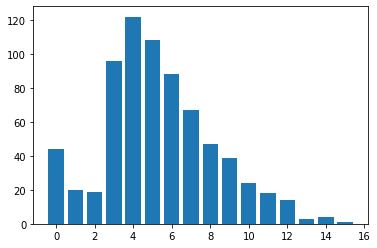

In [22]:
import matplotlib.pyplot as plt

hist_dict = custom_hist(df['Age'].dropna().values, 16)

plt.bar(hist_dict.keys(), hist_dict.values())

# Histogram of number of people in each age category
# bins = 16 --> 80/16 = 5 intervals meaning each bar is in a range of 5

## Q2: How we can plot histogram of Age for female and male with legend?  

Use Pandas with .groupby method and plot the following 

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

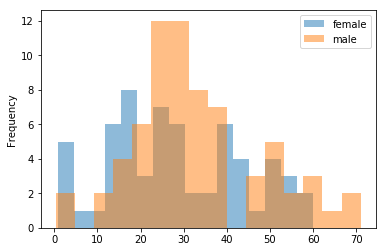

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

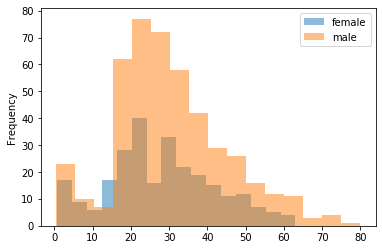

In [35]:
df.groupby('Sex')['Age'].plot(bins=16, kind='hist', legend=True, alpha=0.5)

In [36]:
df.groupby('Sex')['Age'].count()

Sex
female    261
male      453
Name: Age, dtype: int64

In [55]:
df.groupby('Age', sort=True)['Sex'].count()

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Sex, Length: 88, dtype: int64